In [21]:
%reset
%matplotlib inline

import numpy as np
import scipy.io
from scipy.signal import butter, lfilter
import matplotlib.pyplot as plt

import process_data

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


# Read Data
#### Subjects:
* "NST Alona"
* "NST Christoph"
* "NST Emec"
* "NST Leonard"
* "NST Lukas"
* "Graz B1" - "Graz B9"

In [34]:
#subject = "Graz B1"
subject = "NST Emec"

# Read Data
(raw_data, trials, labels, trial_total, 
     fs, mi_interval, subject_str) = process_data.read_data(subject)

# Band-pass Filter Data
lowcut = 0.5
highcut = 50
raw_data = process_data.bandpass_filter(raw_data, lowcut, highcut, fs)

# Notch Filter
f0 = 50.0  # Frequency to be removed from signal (Hz)
Q  = 30.0  # Quality factor
w0 = f0/(fs/2)
raw_data = process_data.bandstop_filter(raw_data, w0, Q)


# Normalize Raw Data
raw_data = process_data.normalize_data(raw_data, type="std")

raw_data.shape, trials.shape, labels.shape, trial_total, fs, mi_interval, subject_str

((557024, 3), (144,), (144,), 11, 256, [5, 11], 'NST Emec')

# Mean Band Power

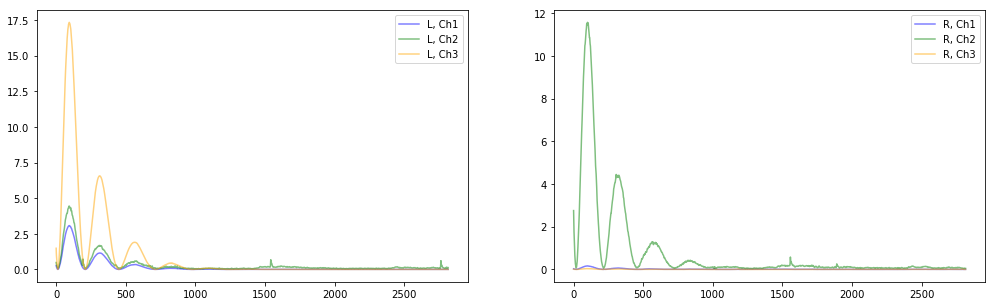

In [35]:
# Split data into classes
class1_mat, class2_mat = process_data.extract_trials(raw_data, trials, labels, trial_total, fs)
class1_mat.shape, class2_mat.shape

# Mean Power over all trials
class1_means = np.power(class1_mat, 2).mean(axis=0)    # (2000, 6) for axis=0
class2_means = np.power(class2_mat, 2).mean(axis=0)    # (2000, 6) for axis=0

# Plot
fig, axis = plt.subplots(1,2, figsize=(17,5))
axis[0].plot(class1_means[:,0], c='blue', alpha=0.5, label='L, Ch1')
axis[0].plot(class1_means[:,1], c='green', alpha=0.5, label='L, Ch2')
axis[0].plot(class1_means[:,2], c='orange', alpha=0.5, label='L, Ch3')
axis[0].legend()
axis[1].plot(class2_means[:,0], c='blue', alpha=0.5, label='R, Ch1')
axis[1].plot(class2_means[:,1], c='green', alpha=0.5, label='R, Ch2')
axis[1].plot(class2_means[:,2], c='orange', alpha=0.5, label='R, Ch3')
axis[1].legend()


# Feature Extraction

In [25]:
raw_data.shape, trials.shape, labels.shape, fs, mi_interval, trial_total

((557024, 3), (144,), (144,), 256, [5, 11], 11)

In [26]:
sub_bands = np.array([np.arange(7,12,1), np.arange(8,13,1)]).T
#sub_bands # (10, 2)

In [27]:
# Init Feature Matrix
#           ( n_trials,    n_subbands * n_channels              )
X = np.zeros((len(trials), sub_bands.shape[0]*raw_data.shape[1]))


# Filter data
filt_subbands = []
for low, high in sub_bands:
    filt_subbands.append(process_data.bandpass_filter(raw_data, low, high, fs))

# Extract Features
for t, trial in enumerate(trials):            # iterate over trials (samples)
    
    # Idle Power from trial (n_channels,)
    idle_power = np.power((raw_data[trial: trial+mi_interval[0]*fs, :]), 2).mean(axis=0)
    
    power = []
    # MI Power in different sub-bands
    for subband in filt_subbands:             # iterate over sub-band filtered data
        
        mi_power = np.power(subband[trial+mi_interval[0]*fs : trial+mi_interval[1]*fs, :], 2).mean(axis=0) # (n_channels,)
        
        feat = np.nanmean(mi_power / idle_power )
        print('')
        print(feat)
        print(mi_power)
        print(idle_power)

        
         

    

    


2.77024164228e+20
[  5.70260649e+21   1.45974234e+22   3.67142435e+22]
[  27.42719798   37.59128759  156.34044207]

79.0310461027
[  215.82062393  7435.93254936  4911.32325315]
[  27.42719798   37.59128759  156.34044207]

2869.24090842
[  82858.5984528    91021.72370684  494869.63337367]
[  27.42719798   37.59128759  156.34044207]

0.0087851018729
[ 0.22374973  0.43051188  1.05450332]
[  27.42719798   37.59128759  156.34044207]

2864.22853444
[  79618.00371556  108494.64847992  438321.65945451]
[  27.42719798   37.59128759  156.34044207]

2.31118124545e+47
[  5.84454260e+43   2.17655923e+44   3.55627562e+44]
[ 0.00183415  0.0443194   0.00054164]

14866052457.0
[   659384.67543697  10516657.97038968  23832798.55630853]
[ 0.00183415  0.0443194   0.00054164]

6.60154766738e+13
[  1.98029478e+10   1.56523799e+10   1.01230191e+11]
[ 0.00183415  0.0443194   0.00054164]

159.488009871
[ 0.12846657  0.2119029   0.21862744]
[ 0.00183415  0.0443194   0.00054164]

3.26617716154e+14
[  9.22687667

//anaconda/envs/env35std/lib/python3.5/site-packages/ipykernel/__main__.py:21: RuntimeWarning: overflow encountered in power
//anaconda/envs/env35std/lib/python3.5/site-packages/ipykernel/__main__.py:23: RuntimeWarning: Mean of empty slice


[ nan  nan  nan]
[ 0.00270716  0.06005159  0.00053848]

1.46099452818e+234
[  7.58846150e+230   1.16236671e+233   1.16691891e+231]
[ 0.00270716  0.06005159  0.00053848]

inf
[ inf  inf  inf]
[ 0.00270716  0.06005159  0.00053848]

0.246903411579
[ 0.00079879  0.00858426  0.000163  ]
[ 0.00270716  0.06005159  0.00053848]

inf
[ inf  inf  inf]
[ 0.00270716  0.06005159  0.00053848]

nan
[ nan  nan  nan]
[ 0.01111518  0.07512254  0.0009838 ]

6.29637450622e+245
[  3.94100458e+241   1.41305287e+245   4.29865419e+240]
[ 0.01111518  0.07512254  0.0009838 ]

inf
[ inf  inf  inf]
[ 0.01111518  0.07512254  0.0009838 ]

0.0710248486342
[  1.26049352e-03   5.87912490e-03   2.10641743e-05]
[ 0.01111518  0.07512254  0.0009838 ]

inf
[ inf  inf  inf]
[ 0.01111518  0.07512254  0.0009838 ]

nan
[ nan  nan  nan]
[   1.41610817  104.22417047    0.3316719 ]

1.02173141588e+254
[  1.84675148e+252   3.17610112e+256   1.58486240e+251]
[   1.41610817  104.22417047    0.3316719 ]

inf
[ inf  inf  inf]
[   1.416

In [28]:
raw_data.shape, subband.shape

((557024, 3), (557024, 3))

In [8]:
print('{:.2f}'.format(1))

1.00
